<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Cargando los Datos

experiencia = pd.Series([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])

salario = pd.Series([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])

In [25]:
#los unifico en una sola tabla

df=pd.DataFrame({'Experiencia':Experiencia, 'Series':salario})
df

,Experiencia,Series
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [26]:
#Hacer una consultar para ver si hay nulos en salarios
salario.isnull().sum()

0

In [27]:
#Hacer una consultar para ver si hay nulos en expereciencia
experiencia.isnull().sum()

0

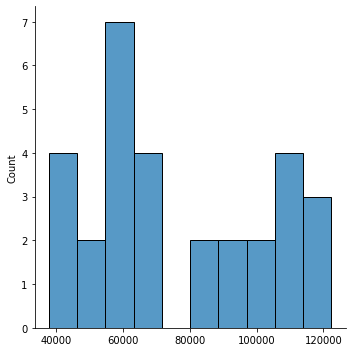

In [28]:
#Graficar de relacion de valores
sns.displot(salario, bins=10)
plt.show()

<AxesSubplot:>

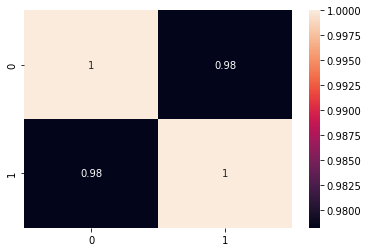

In [29]:
#Matriz de correlacion de pearson, que nos sirve para medir la relacion lineal entra par de elemento o variables
correlacion_matriz_salary=np.corrcoef(salario,experiencia) #coeficiente de correlacion
sns.heatmap(data=correlacion_matriz_salary,annot=True) #Para hacer un mapa de calor

In [30]:
#Lo que observamos es que la diagonal de izquiera a derecha siempre  va a ser 1
#Y la diagonal derecha a izquieda no dice cuanto varia desde ese valor, en este caso es 0.98 la correlacion de pearson
#Concluye que la correlacion es muy buena

Text(0, 0.5, 'Salario')

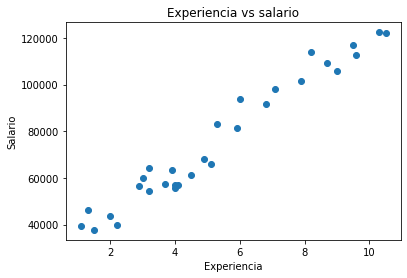

In [31]:
#Grafica de Expereciencia vs salario

plt.scatter(experiencia,salario)
plt.title("Experiencia vs salario")
plt.xlabel("Experiencia")
plt.ylabel("Salario")

In [32]:
print('maximo valor {}'.format(salario.max()))
print('minimo valor {}'.format(salario.min()))
print('promedio salario {}'.format(salario.mean()))
print('desviacion estandar salario {}'.format(salario.std()))

maximo valor 122391.0
minimo valor 37731.0
promedio salario 76003.0
desviacion estandar salario 27414.4297845823


In [35]:
#DATO DE EXPERENCIA, DE ENTRENAMIENTO Y DE TESTEO
x_experiencia= experiencia
y_salario=salario
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_experiencia, y_salario, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6,)
(24,)
(6,)


In [ ]:
#CALCULAR EL COEFICIENTE DE CORRELACION

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#x_train=x_train.values.reshape(-1, 1)
lin_model= LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [47]:
from sklearn.metrics import r2_score
#x_test=x_test.values.reshape(-1, 1)
y_test_predict = lin_model.predict(x_test)
r2=r2_score(y_test,y_test_predict)
print('El coeficiente de correlacion es:')
print('--------------------------------')
print('R2 score es {}'.format(r2))

El coeficiente de correlacion es:
--------------------------------
R2 score es 0.9024461774180497


In [49]:
#CALCULO DE LA PENDIENTE DE LA RECTA Y LA CONSTANTE CUANDO X IGUAL A 0
# y=mX + b

print('Coeficiente: \n', lin_model.coef_ )
print('Variables independiente: \n', lin_model.intercept_)

Coeficiente: 
 [9423.81532303]
Variables independiente: 
 25321.583011776813


In [52]:
#RECTA DE LA REGRESION LINEAL SIMPLE, OBTENER LOS 5 PRIMEROS VALORES DEL ARREGLO
experiencia= experiencia.values.reshape(-1,1)
predicted_dada_salario= lin_model.predict(experiencia)
predicted_dada_salario[0:5]

array([35687.77986711, 37572.54293172, 39457.30599632, 44169.21365784,
       46053.97672244])

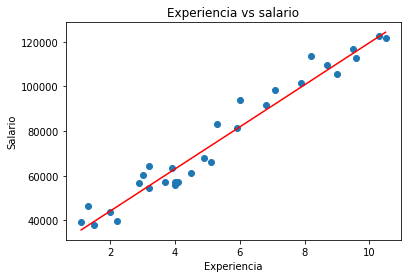

In [55]:
#Ahora graficamos la recta conformado por esos valores
plt.scatter(experiencia,salario)
plt.plot(experiencia,predicted_dada_salario, color='red')
plt.title("Experiencia vs salario")
plt.xlabel("Experiencia")
plt.ylabel("Salario")
plt.show()

In [56]:
#Mostrar los datos actual vs prediccion

df1=pd.DataFrame({'Real': salario, 'Prediccion': predicted_dada_salario })
df1

,Real,Prediccion
0,39343.0,35687.779867
1,46205.0,37572.542932
2,37731.0,39457.305996
3,43525.0,44169.213658
4,39891.0,46053.976722
5,56642.0,52650.647449
6,60150.0,53593.028981
7,54445.0,55477.792045
8,64445.0,55477.792045
9,57189.0,60189.699707


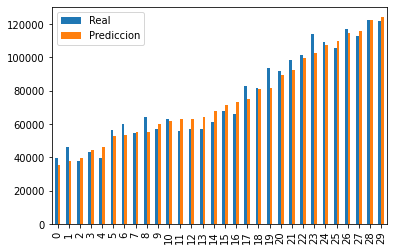

In [58]:
#Comparacion de forma grafica

df1.head(30).plot(kind='bar')
plt.show()